In [1]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
#experiment = 'Spontaneous_edge_tracking'
experiment = 'hdeltac/csv'
# experiment = 'hdeltac'
# 'hdeltac/csv/20220517_hdc_split_60d05_sytgcamp7f'
src_dir = os.path.join(root_dir, experiment)
# src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
print(src_dir)
fig_id = os.path.join(root_dir.split('/My Drive')[1], experiment)
savedir = '/Users/julianarhee/Documents/rutalab/data/gdrive/{}'.format(experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/hdeltac/csv
Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/gdrive/hdeltac/csv/figures


In [276]:
log_files = sorted(glob.glob(os.path.join(src_dir, '2022*', 'et', '*.csv')), \
                   key=util.natsort)
#log_files = sorted(glob.glob(os.path.join(src_dir, '*.log')), key=util.natsort)
print("Found {} raw .log behavior files.".format(len(log_files)))

for fi, fpath in enumerate(log_files):
    dfn = fpath.split('/hdeltac/csv/')[1].split('/et')[0]
    print(fi, dfn)

Found 7 raw .log behavior files.
0 20220517_hdc_split_60d05_sytgcamp7f
1 20220627_hdc_split_Fly1
2 20220627_hdc_split_Fly2
3 20220628_HDC_sytjGCaMP7f_Fly1
4 20220628_HDC_sytjGCaMP7f_Fly1_45-004
5 20220629_HDC_split_sytjGCaMP7f_Fly1
6 20220629_HDC_split_sytjGCaMP7f_Fly3


In [277]:
strip_width=10
strip_sep=200
# odor_borders = butil.get_odor_grid_all_flies(df0, strip_width=strip_width)

is_csv = True
df0_all = butil.load_combined_df(log_files=log_files, is_csv=True, experiment='hdeltac', 
                                savedir=savedir, save_errors=True, create_new=True,
                                parse_filename=False)
df0_all = df0_all.rename(columns={'Unnamed: 0': 'frame'})
condition_list = df0_all['condition'].unique()
print("Found {} conditions:".format(len(condition_list)))
for c in condition_list:
    print(c)

Processing 7 tracking files.
Correcting experiment conditions: hdeltac/csv/20220517_hdc_split_60d05_sytgcamp7f/et
Saving combined df to: /Users/julianarhee/Documents/rutalab/data/gdrive/hdeltac/csv
Found 1 conditions:
et


## flip 

In [278]:
d_list=[]
odor_borders_fp={}
for trial_id, df_ in df0_all.groupby('trial_id'):
    df_copy, new_borders = butil.check_entryside_and_flip(df_, strip_width=strip_width) #,
                                                      #odor_dict=odict)
    oparams = butil.get_odor_params(df_copy) #[df1['condition']==cond])
    df_copy = df_copy[df_copy['time']>=oparams['odor_start_time']].copy()
    if trial_id=='20220628_HDC_sytjGCaMP7f_Fly1_et':
        d_list.append(df_copy[df_copy['boutnum']>=4])
    else:
        d_list.append(df_copy)
    #assert np.allclose(df_copy['heading'], -1*df_['heading']), "Bad flip: {}".format(trial_id)
    #d_list.append(df_copy)
    odor_borders_fp[trial_id] = new_borders
df_fp = pd.concat(d_list)

... Using default odor min/max, animal 20220629_HDC_split_sytjGCaMP7f_Fly1 did not move in odor


In [279]:
# trial_id = '20220628_HDC_sytjGCaMP7f_Fly1_et'
# df_ = df0_all[df0_all['trial_id']==trial_id].copy()
# df_copy, new_borders = butil.check_entryside_and_flip(df_, strip_width=strip_width) #,
#                                                       #odor_dict=odict)
# oparams = butil.get_odor_params(df_copy)
# oparams

In [280]:
# fig, ax = pl.subplots()
# butil.plot_trajectory(df_, ax=ax, hue_varname='boutnum', palette='colorblind')

In [281]:
heading_vars = [c for c in df_fp.columns if 'phase' in c or 'heading' in c]
group_vars=['fly_id', 'condition' , 'boutnum', 'trial_id']


metrics = df_fp.groupby(['trial_id', 'boutnum'])\
            .apply(butil.get_bout_metrics, group_vars=group_vars,
                   heading_vars=heading_vars).reset_index()
metrics

,trial_id,boutnum,duration,upwind_dist_range,upwind_dist_firstlast,crosswind_dist_range,crosswind_dist_firstlast,path_length,rel_time,average_heading,...,average_offset_phase_fb_upper,average_offset_phase_fb_lower,average_heading_og,speed,upwind_speed,crosswind_speed,instrip,genotype,bout_type,flipped
0,20220517_hdc_split_60d05_sytgcamp7f_et,2,5.701175,52.885273,52.885273,6.867515,4.579880,56.758945,109.905248,0.137456,...,0.618791,2.494751,0.137456,9.792398,9.231061,0.908924,True,,instrip,False
1,20220517_hdc_split_60d05_sytgcamp7f_et,3,6.901919,16.455079,15.161460,4.399168,-0.517882,24.424286,115.705342,-0.097439,...,-0.409753,2.039847,-0.097439,3.430381,2.202061,-0.073913,False,,outstrip,False
2,20220517_hdc_split_60d05_sytgcamp7f_et,4,3.401313,36.626237,36.626237,4.514630,0.789211,39.962580,122.706309,-0.133207,...,2.598946,0.662162,-0.133207,11.503264,10.514551,0.118340,True,,instrip,False
3,20220517_hdc_split_60d05_sytgcamp7f_et,5,4.895449,22.186440,22.186440,7.606974,0.592004,33.316070,126.208209,-0.094540,...,2.622299,2.167977,-0.094540,6.573995,4.513468,0.004779,False,,outstrip,False
4,20220517_hdc_split_60d05_sytgcamp7f_et,6,5.997935,63.582138,63.582138,4.632523,0.080025,69.488505,131.202813,-0.055896,...,2.915913,1.146634,-0.055896,11.410574,10.518838,-0.044123,True,,instrip,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,20220629_HDC_split_sytjGCaMP7f_Fly3_et,9,23.402724,55.771580,55.702462,6.849231,0.148883,75.299725,169.488733,-0.101529,...,-2.849545,-0.409182,-0.101529,3.070507,2.374578,-0.016173,False,,outstrip,False
249,20220629_HDC_split_sytjGCaMP7f_Fly3_et,10,2.611493,14.578378,14.301622,2.266124,0.388884,17.593268,192.989091,-0.056258,...,-1.858101,0.059295,-0.056258,6.649472,5.355720,0.064154,True,,instrip,False
250,20220629_HDC_split_sytjGCaMP7f_Fly3_et,11,12.595812,47.389059,45.265120,6.013591,-0.218978,59.109544,195.696917,-0.037877,...,-1.741926,-0.193999,-0.037877,4.570775,3.599514,-0.005600,False,,outstrip,False
251,20220629_HDC_split_sytjGCaMP7f_Fly3_et,12,1.398397,10.312945,10.312945,1.348393,-0.284274,10.829090,208.400005,-0.613831,...,-0.628298,-0.121198,-0.613831,7.599588,7.155883,-0.106004,True,,instrip,False


In [282]:
df_fp = df_fp.reset_index()

In [283]:
for (trial_id, bnum), b_ in df_fp.groupby(['trial_id', 'boutnum']):
    df_fp.loc[b_.index, 'ft_posx_start0'] = b_['ft_posx'] - b_['ft_posx'].iloc[0]
    df_fp.loc[b_.index, 'ft_posy_start0'] = b_['ft_posy'] - b_['ft_posy'].iloc[0]
    
for (trial_id, bnum), b_ in df_fp.groupby(['trial_id', 'boutnum']):
    df_fp.loc[b_.index, 'ft_posx_norm'] = util.convert_range(b_['ft_posx_start0'], 
                                                              newmin=0, newmax=1)
    df_fp.loc[b_.index, 'ft_posy_norm'] = util.convert_range(b_['ft_posy_start0'], 
                                                              newmin=0, newmax=1)

In [284]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [285]:
len(metrics['trial_id'].unique())

7

In [286]:
metrics.groupby(['trial_id'])['duration'].max() #.unique()

trial_id
20220517_hdc_split_60d05_sytgcamp7f_et      33.407670
20220627_hdc_split_Fly1_et                 211.398600
20220627_hdc_split_Fly2_et                 190.189917
20220628_HDC_sytjGCaMP7f_Fly1_45-004_et    343.799184
20220628_HDC_sytjGCaMP7f_Fly1_et           148.711261
20220629_HDC_split_sytjGCaMP7f_Fly1_et      41.697902
20220629_HDC_split_sytjGCaMP7f_Fly3_et     689.700094
Name: duration, dtype: float64

In [287]:
trial_id

'20220629_HDC_split_sytjGCaMP7f_Fly3_et'

In [288]:
trial_id = '20220628_HDC_sytjGCaMP7f_Fly1_et'
longbouts = metrics[(metrics['duration']>=2.0) \
                    & (metrics['trial_id']==trial_id)]['boutnum'].unique()
len(longbouts)

34

<IPython.core.display.Javascript object>


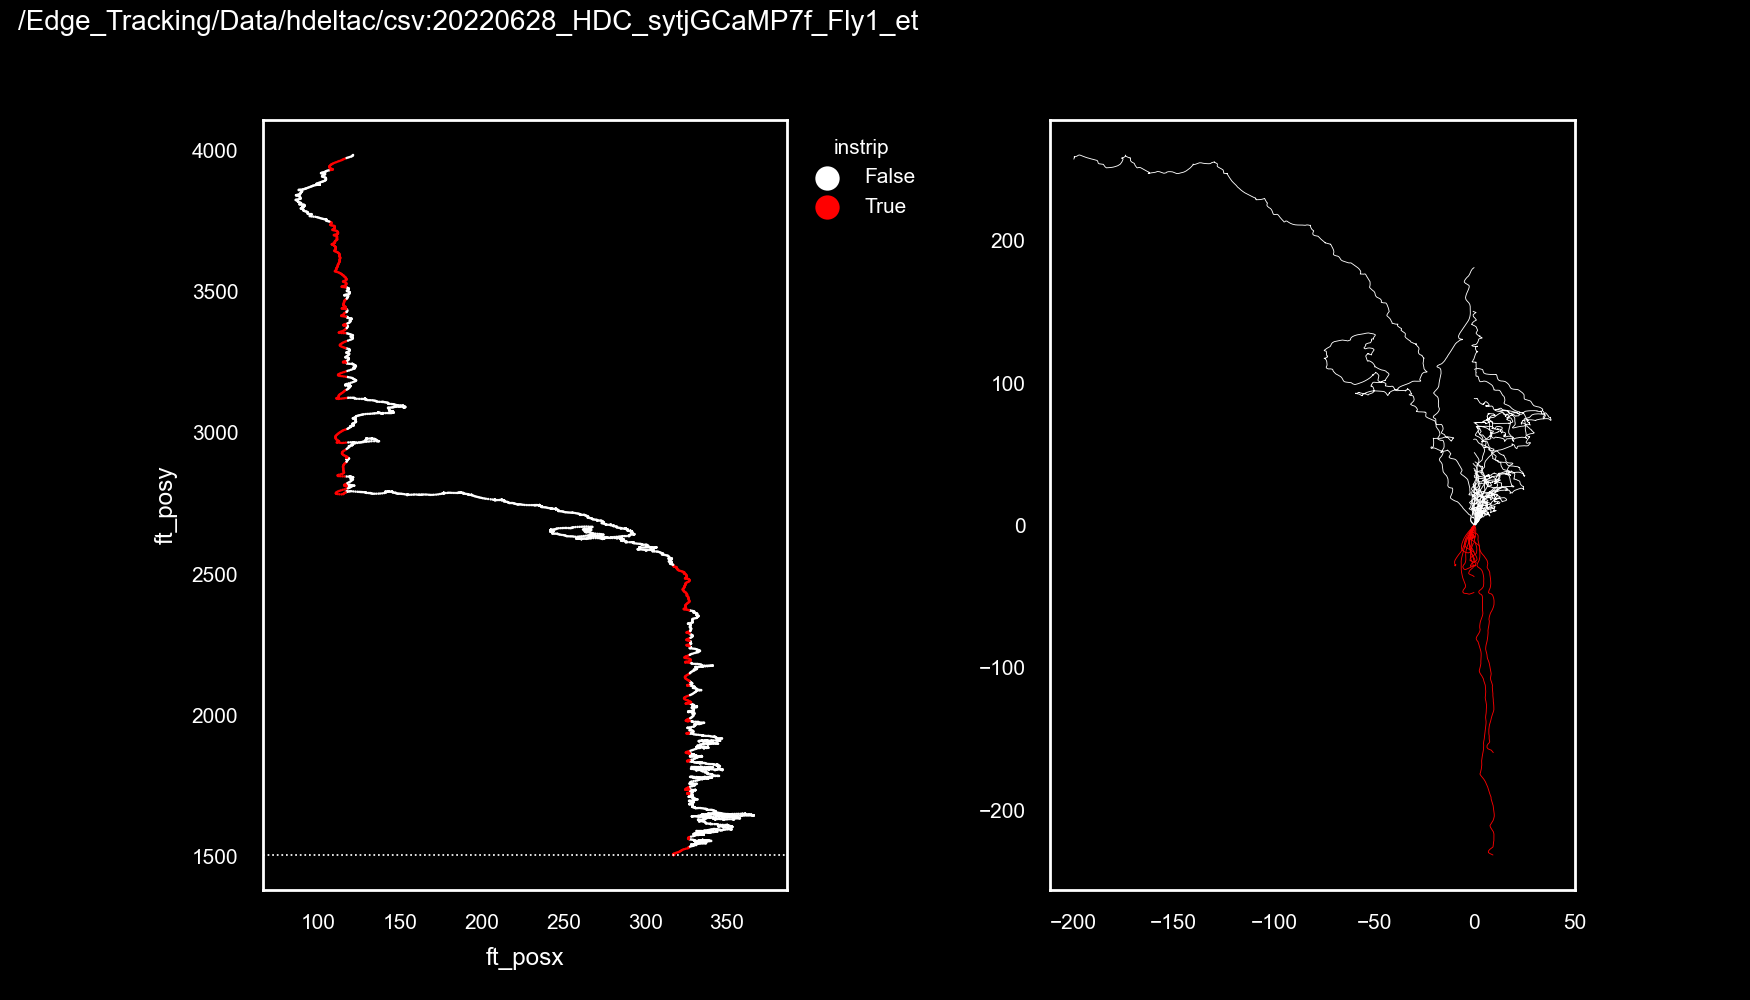

In [289]:
trial_id = '20220628_HDC_sytjGCaMP7f_Fly1_et'
longbouts = metrics[(metrics['duration']>=2.0) \
                    & (metrics['trial_id']==trial_id)]['boutnum'].unique()
fig, axn = pl.subplots(1, 2, figsize=(7,4))

df = df_fp[df_fp['trial_id']==trial_id].copy()
ax=axn[0]
ax = butil.plot_trajectory(df, ax=ax)

ax=axn[1]
plotb = df[(df['boutnum']>=2) * (df['boutnum'].isin(longbouts))].copy()

currd = plotb[~plotb['instrip']].copy()
currbouts = currd['boutnum'].unique()

norm_ = mpl.colors.Normalize(vmin=currbouts.min(), vmax=currbouts.max())
cmap_ = mpl.cm.viridis
cols = [cmap_(norm_(v)) for v in currbouts]
for c, (bnum, b_) in zip(cols, currd.groupby('boutnum')):
    inbout = df[df['boutnum']==bnum-1].copy()
    ax.plot(b_['ft_posx_start0'], b_['ft_posy_start0'], 
        lw=0.25, color='w')
    ax.plot(inbout['ft_posx_start0']-inbout['ft_posx_start0'].iloc[-1], 
            inbout['ft_posy_start0']-inbout['ft_posy_start0'].iloc[-1],
        lw=0.25, color='r')
pl.subplots_adjust(left=0.15, wspace=0.5, right=0.9)
util.label_figure(fig, '{}:{}'.format(fig_id, trial_id))

<IPython.core.display.Javascript object>


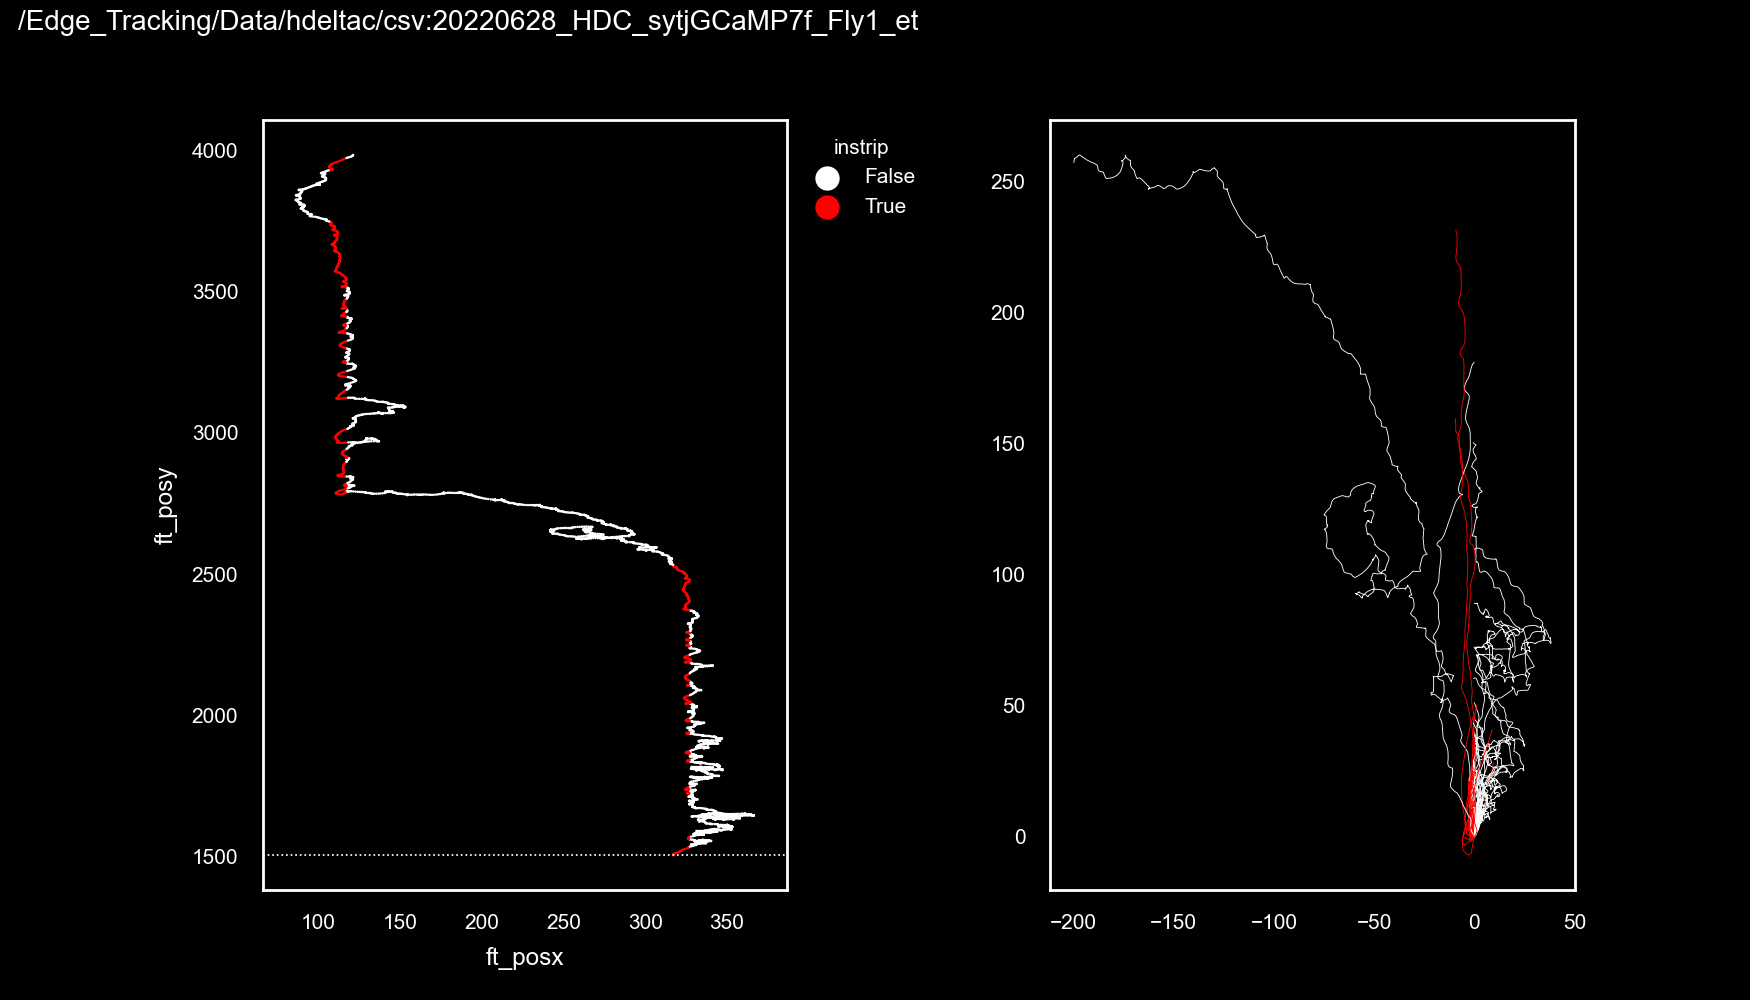

In [290]:
trial_id = '20220628_HDC_sytjGCaMP7f_Fly1_et'
longbouts = metrics[(metrics['duration']>=2.0) \
                    & (metrics['trial_id']==trial_id)]['boutnum'].unique()
fig, axn = pl.subplots(1, 2, figsize=(7,4))

df = df_fp[df_fp['trial_id']==trial_id].copy()
ax=axn[0]
ax = butil.plot_trajectory(df, ax=ax)

ax=axn[1]
plotb = df[(df['boutnum']>=2)].copy()

currd = plotb[~plotb['instrip']].copy()
currbouts = currd['boutnum'].unique()

norm_ = mpl.colors.Normalize(vmin=currbouts.min(), vmax=currbouts.max())
cmap_ = mpl.cm.viridis
cols = [cmap_(norm_(v)) for v in currbouts]
for c, (bnum, b_) in zip(cols, currd.groupby('boutnum')):
    inbout = df[df['boutnum']==bnum-1].copy()
    ax.plot(b_['ft_posx_start0'], b_['ft_posy_start0'], 
        lw=0.25, color='w')
    ax.plot(inbout['ft_posx_start0'], #-inbout['ft_posx_start0'].iloc[-1], 
            inbout['ft_posy_start0'], #-inbout['ft_posy_start0'].iloc[-1],
        lw=0.25, color='r')
pl.subplots_adjust(left=0.15, wspace=0.5, right=0.9)
util.label_figure(fig, '{}:{}'.format(fig_id, trial_id))

In [293]:
trial_ids = df_fp['trial_id'].unique()

<IPython.core.display.Javascript object>


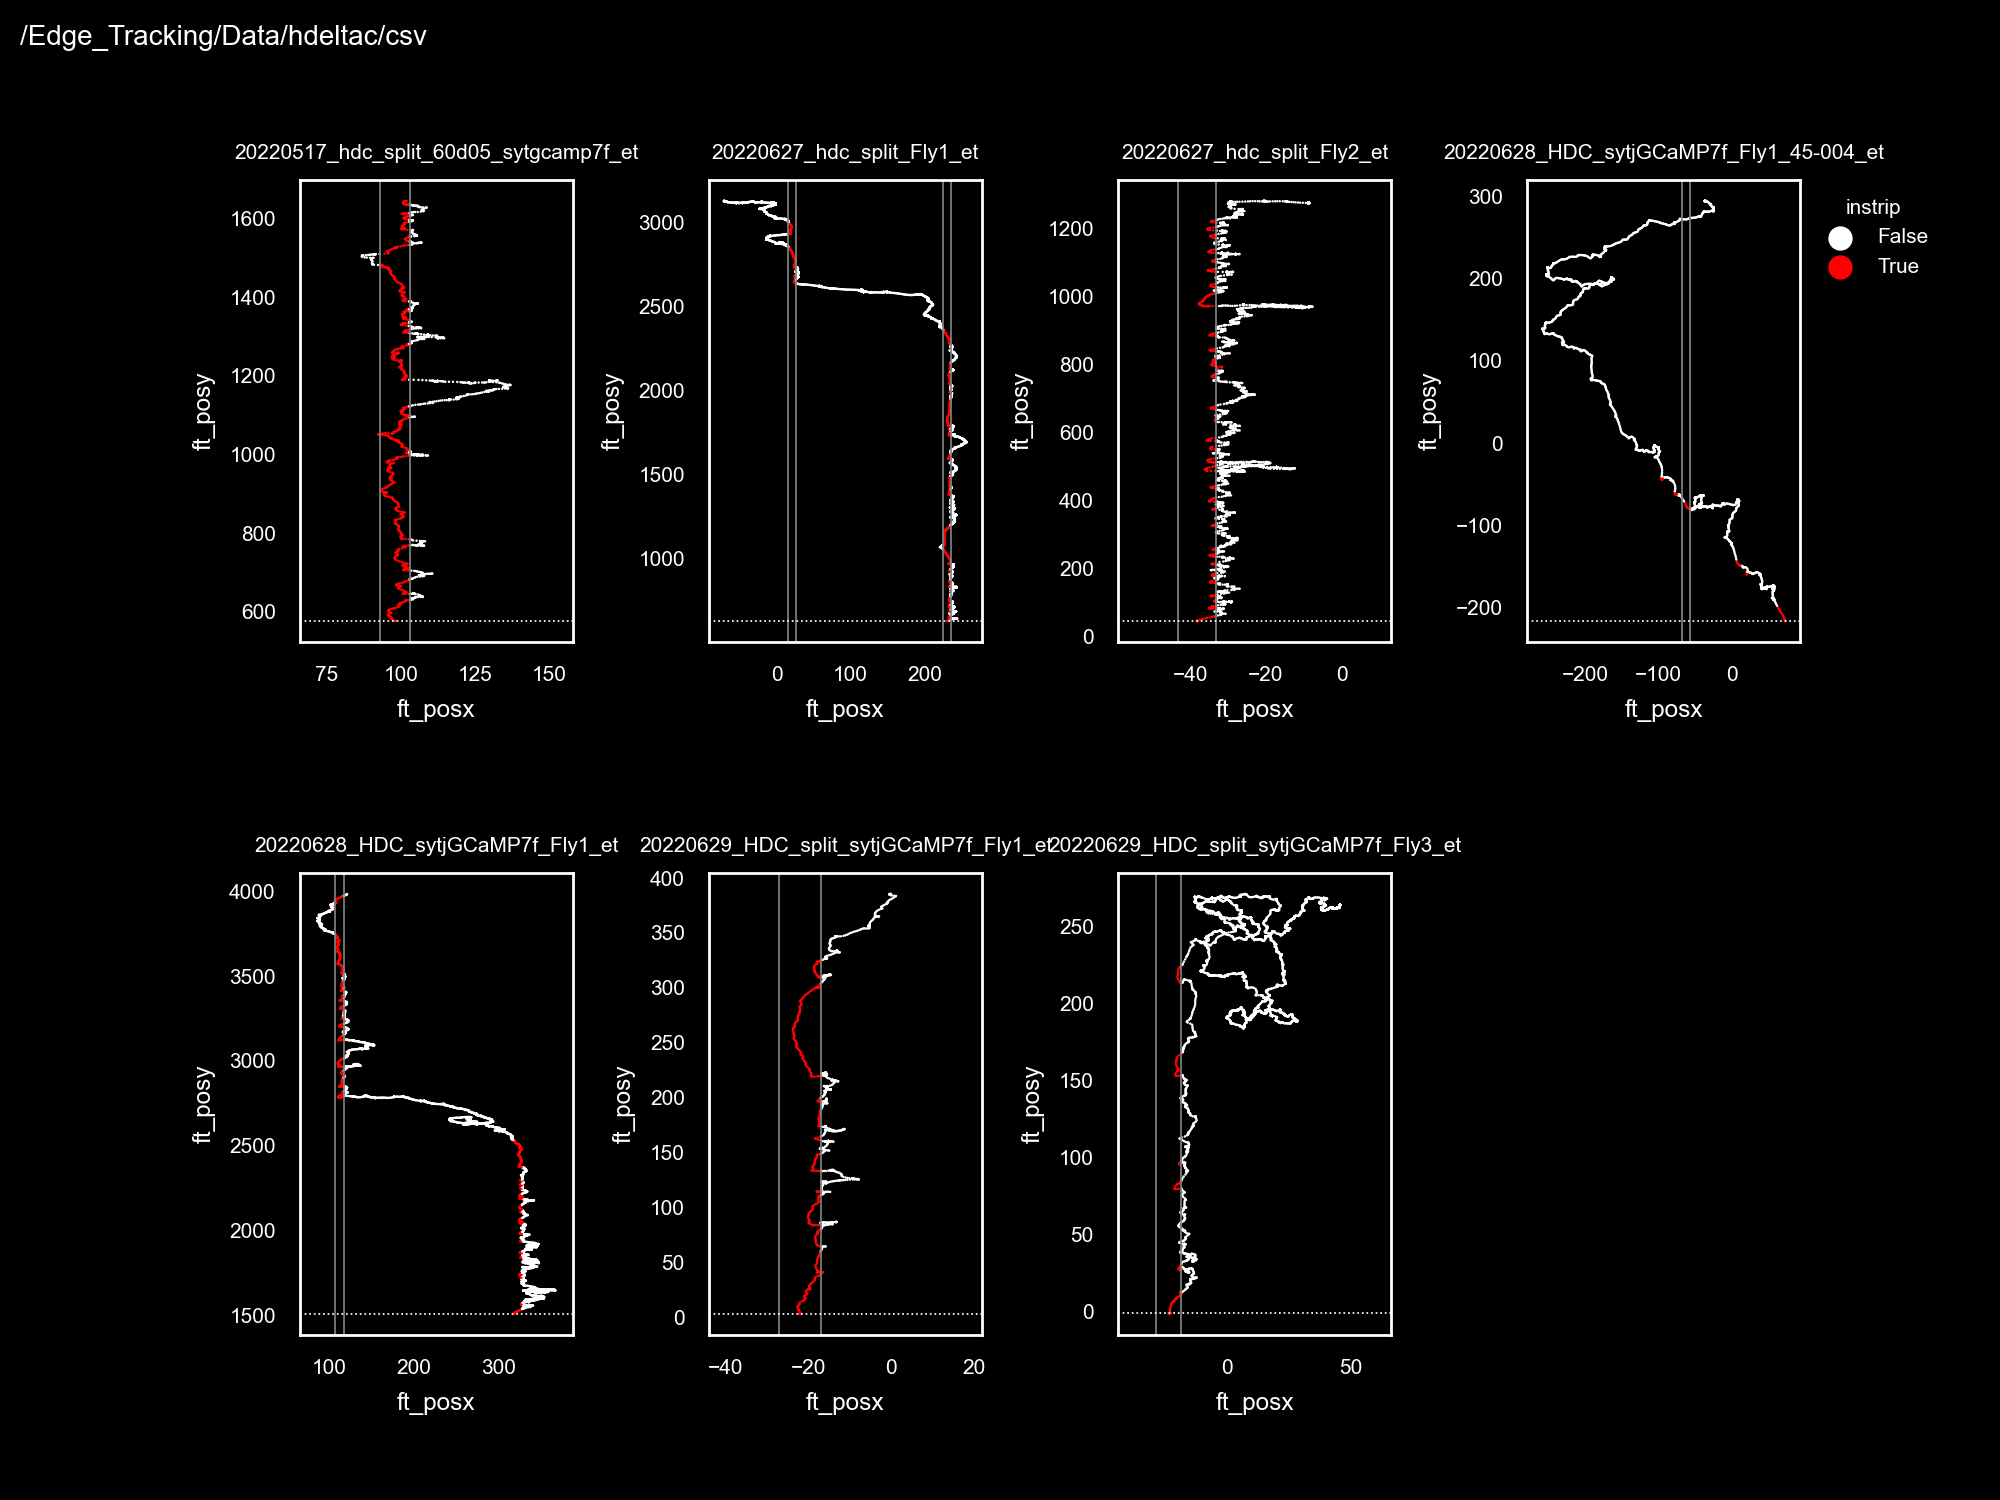

In [311]:
fig, axn = pl.subplots(2, 4, figsize=(8, 6))
for ai, (ax, (trial_id, df)) in enumerate(zip(axn.flat, df_fp.groupby('trial_id'))):
    
    plotb = df[(df['boutnum']>=2)].copy() #* (df['boutnum'].isin(longbouts))].copy()
    strip_borders = butil.find_strip_borders(df, strip_width=strip_width, strip_sep=strip_sep,
                                             is_grid=True, get_all_borders=True)
    butil.plot_trajectory(plotb, ax=ax,odor_bounds=strip_borders)
    if ai!=3:
        ax.legend_.remove()
    ax.set_title(trial_id, fontsize=6)
for ax in axn.flat[len(trial_ids):]:
    ax.axis('off')
pl.subplots_adjust(wspace=0.5, hspace=0.5, right=0.9, left=0.15)
util.label_figure(fig, fig_id)

figname = 'normtraj-not_all_flies'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

<IPython.core.display.Javascript object>


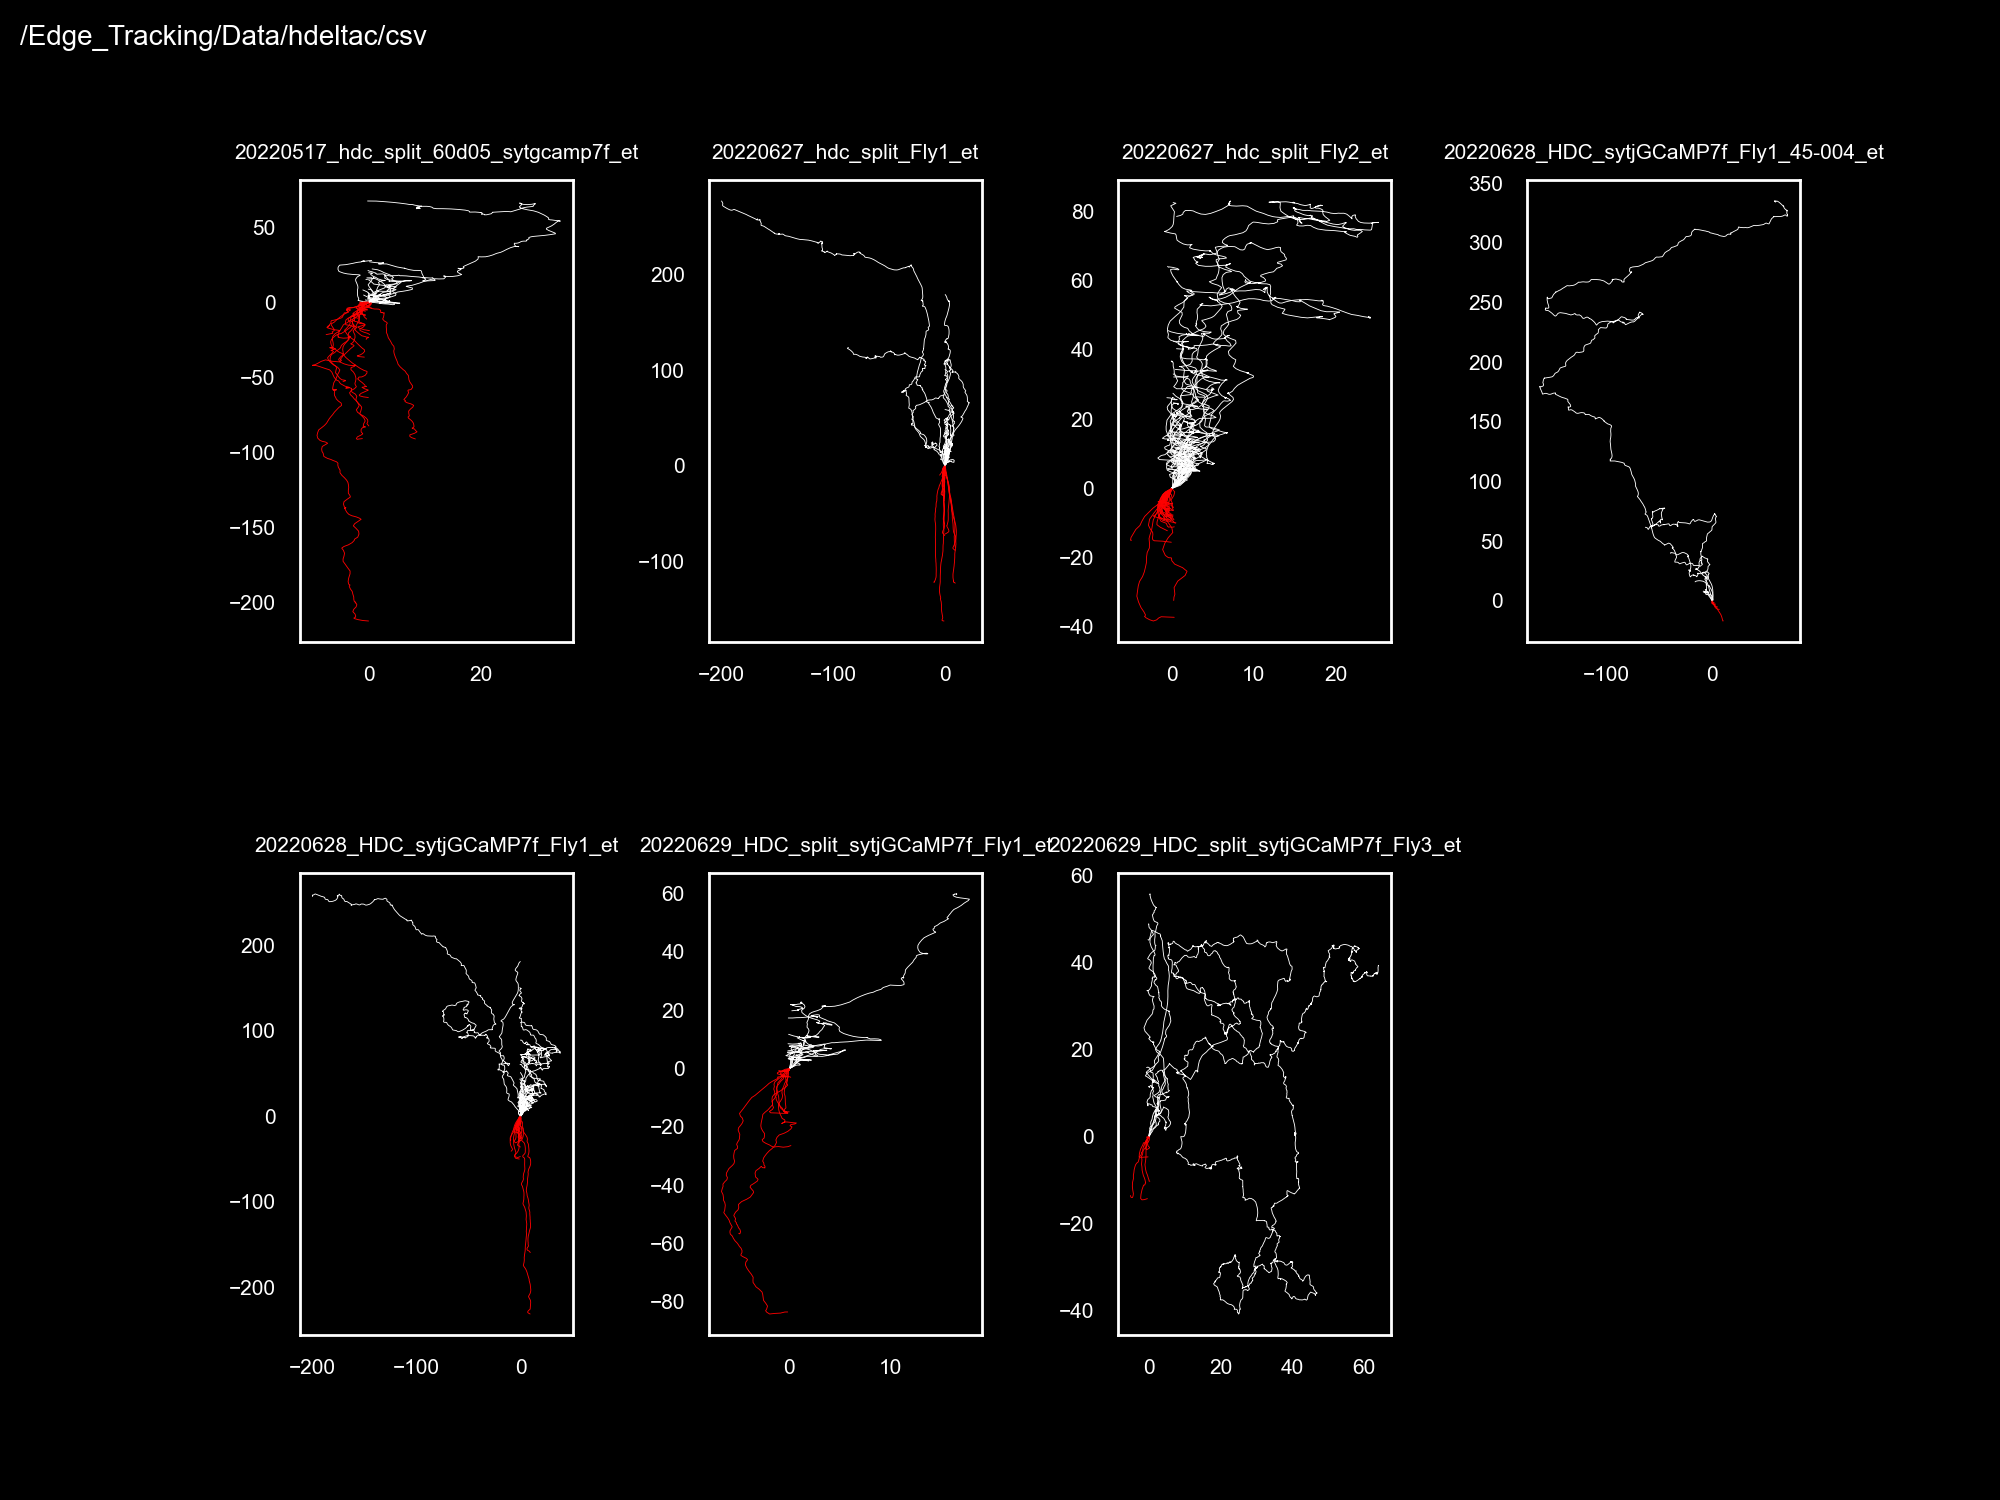

In [310]:
fig, axn = pl.subplots(2, 4, figsize=(8, 6))
for ax, (trial_id, df) in zip(axn.flat, df_fp.groupby('trial_id')):
    
    plotb = df[(df['boutnum']>=2)].copy() #* (df['boutnum'].isin(longbouts))].copy()
    currd = plotb[~plotb['instrip']].copy()
    norm_ = mpl.colors.Normalize(vmin=currd['boutnum'].unique().min(), 
                                 vmax=currd['boutnum'].unique().max())
    cmap_ = mpl.cm.viridis
    cols = [cmap_(norm_(v)) for v in currd['boutnum'].unique()]
    for c, (bnum, b_) in zip(cols, currd.groupby('boutnum')):
        inbout = df[df['boutnum']==bnum-1].copy()
        ax.plot(b_['ft_posx_start0'], b_['ft_posy_start0'], 
            lw=0.25, color='w')
        ax.plot(inbout['ft_posx_start0']-inbout['ft_posx_start0'].iloc[-1], 
                inbout['ft_posy_start0']-inbout['ft_posy_start0'].iloc[-1],
            lw=0.25, color='r')
    ax.set_title(trial_id, fontsize=6)
for ax in axn.flat[len(trial_ids):]:
    ax.axis('off')
pl.subplots_adjust(wspace=0.5, hspace=0.5, right=0.9, left=0.15)
util.label_figure(fig, fig_id)

figname = 'normtraj_all_flies'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

## plot individuals

<IPython.core.display.Javascript object>


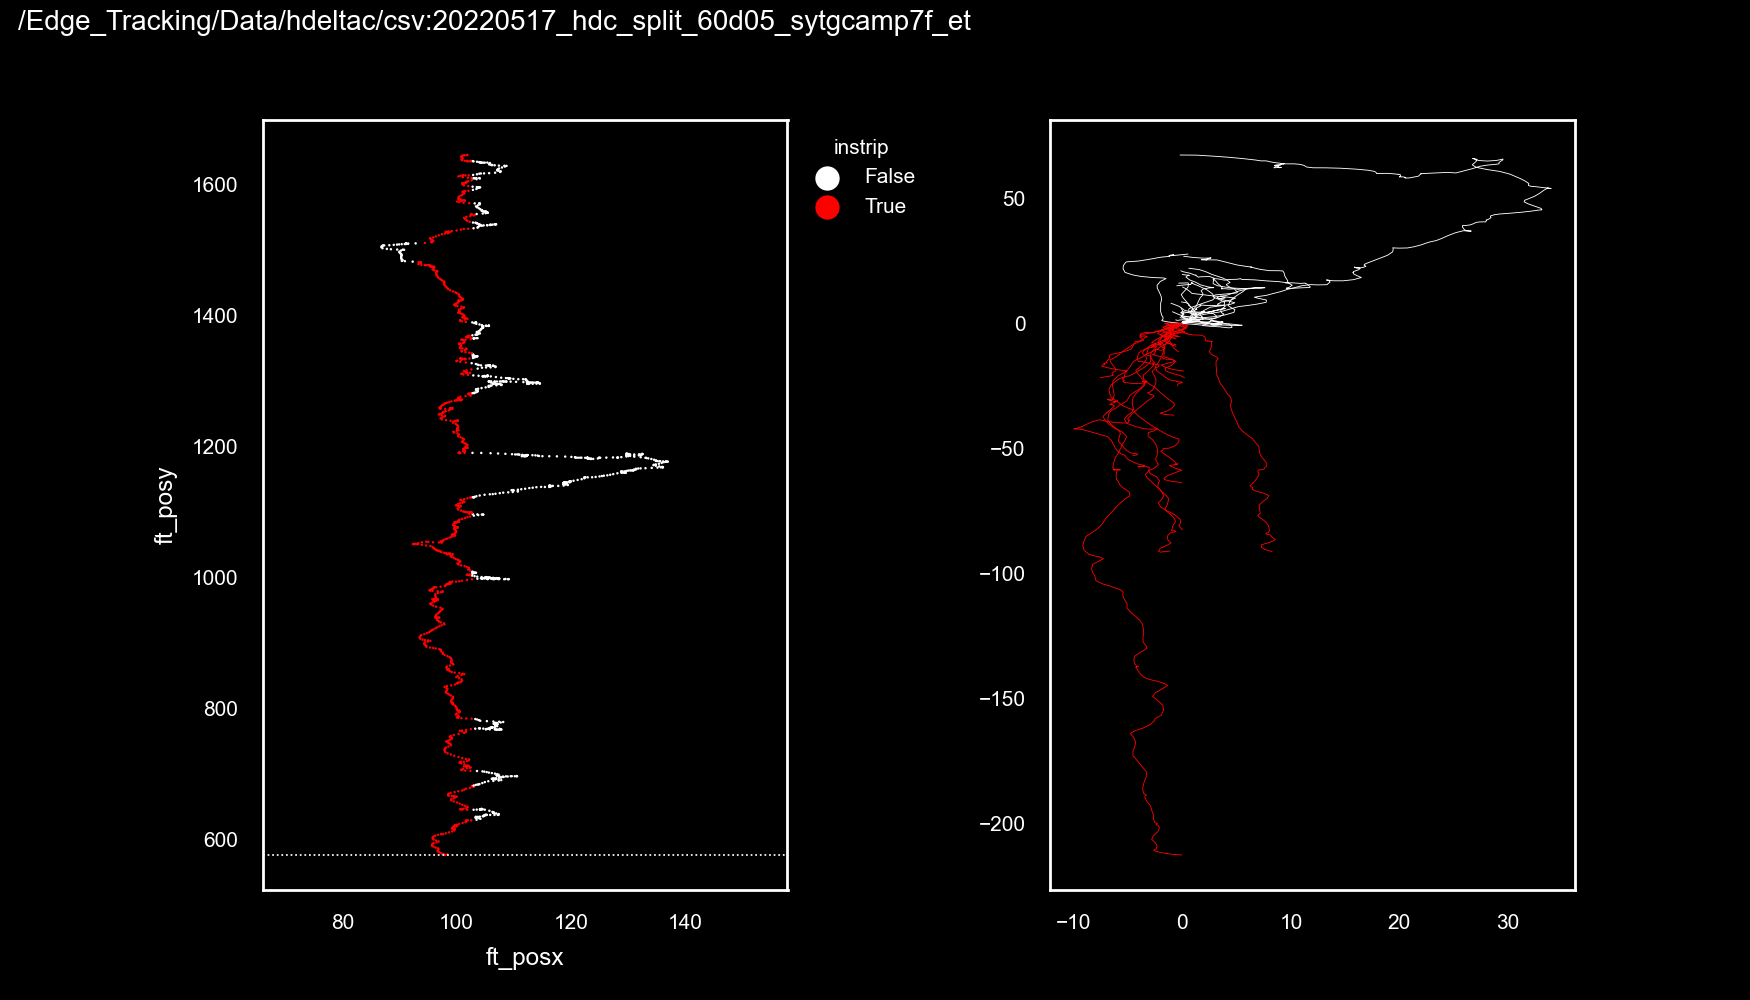

<IPython.core.display.Javascript object>


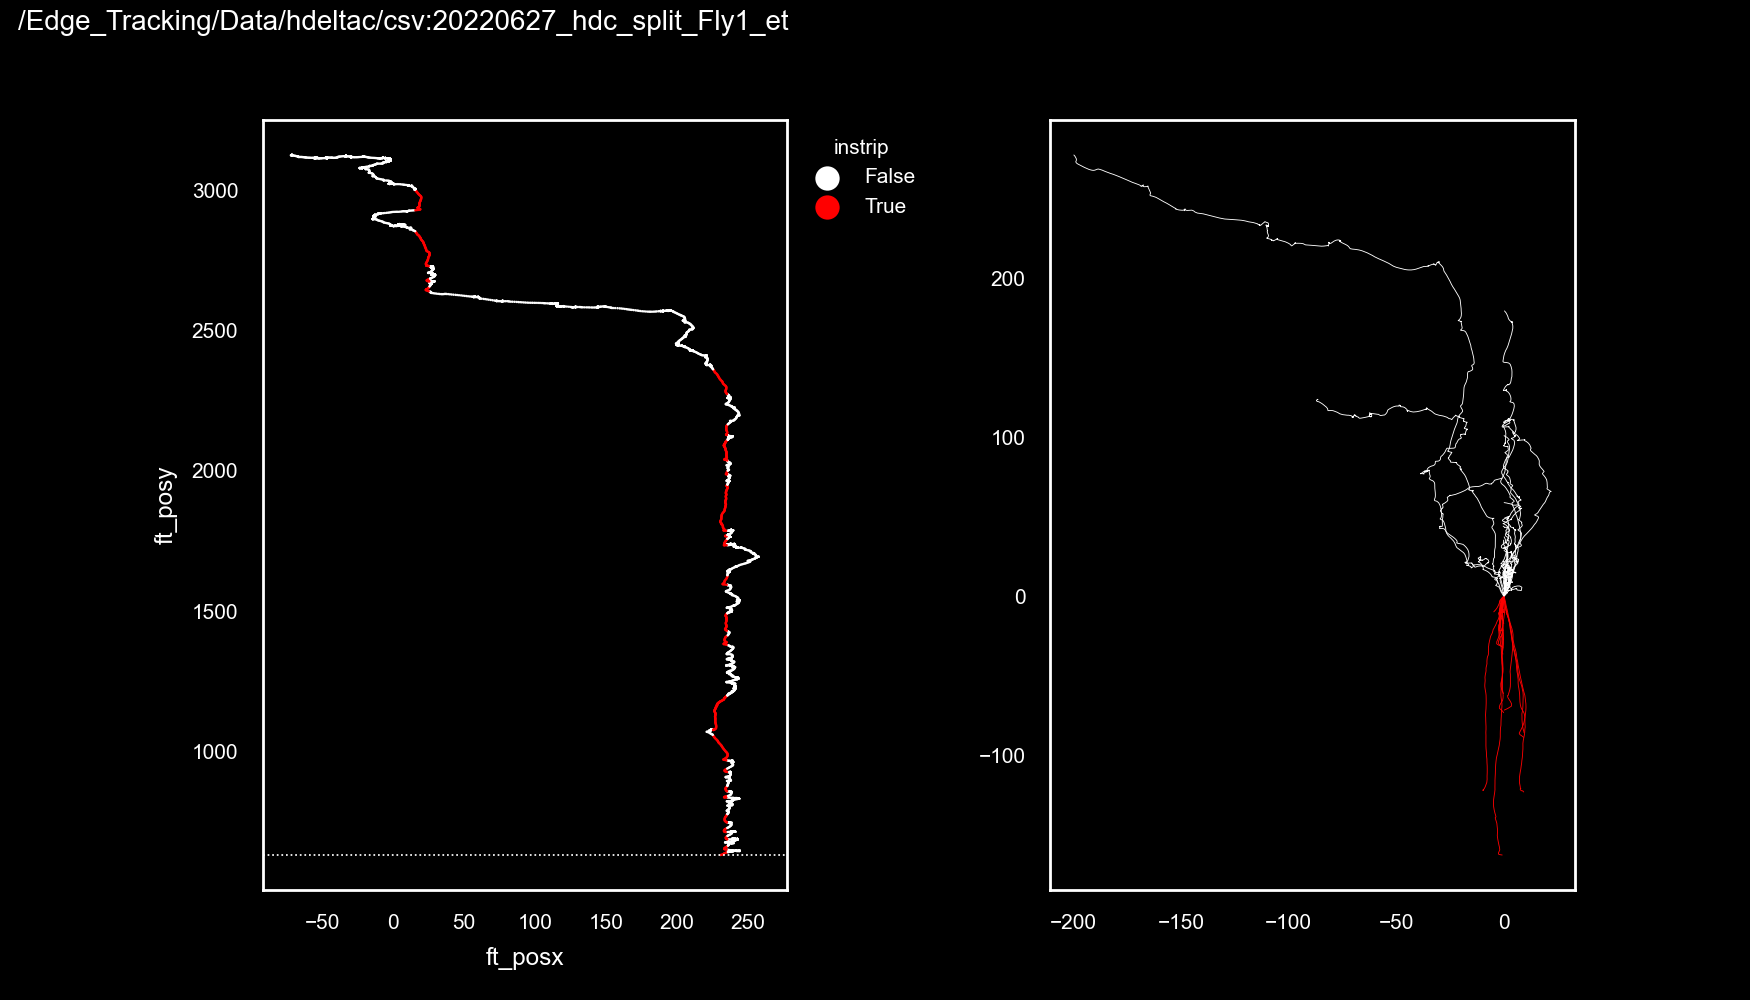

<IPython.core.display.Javascript object>


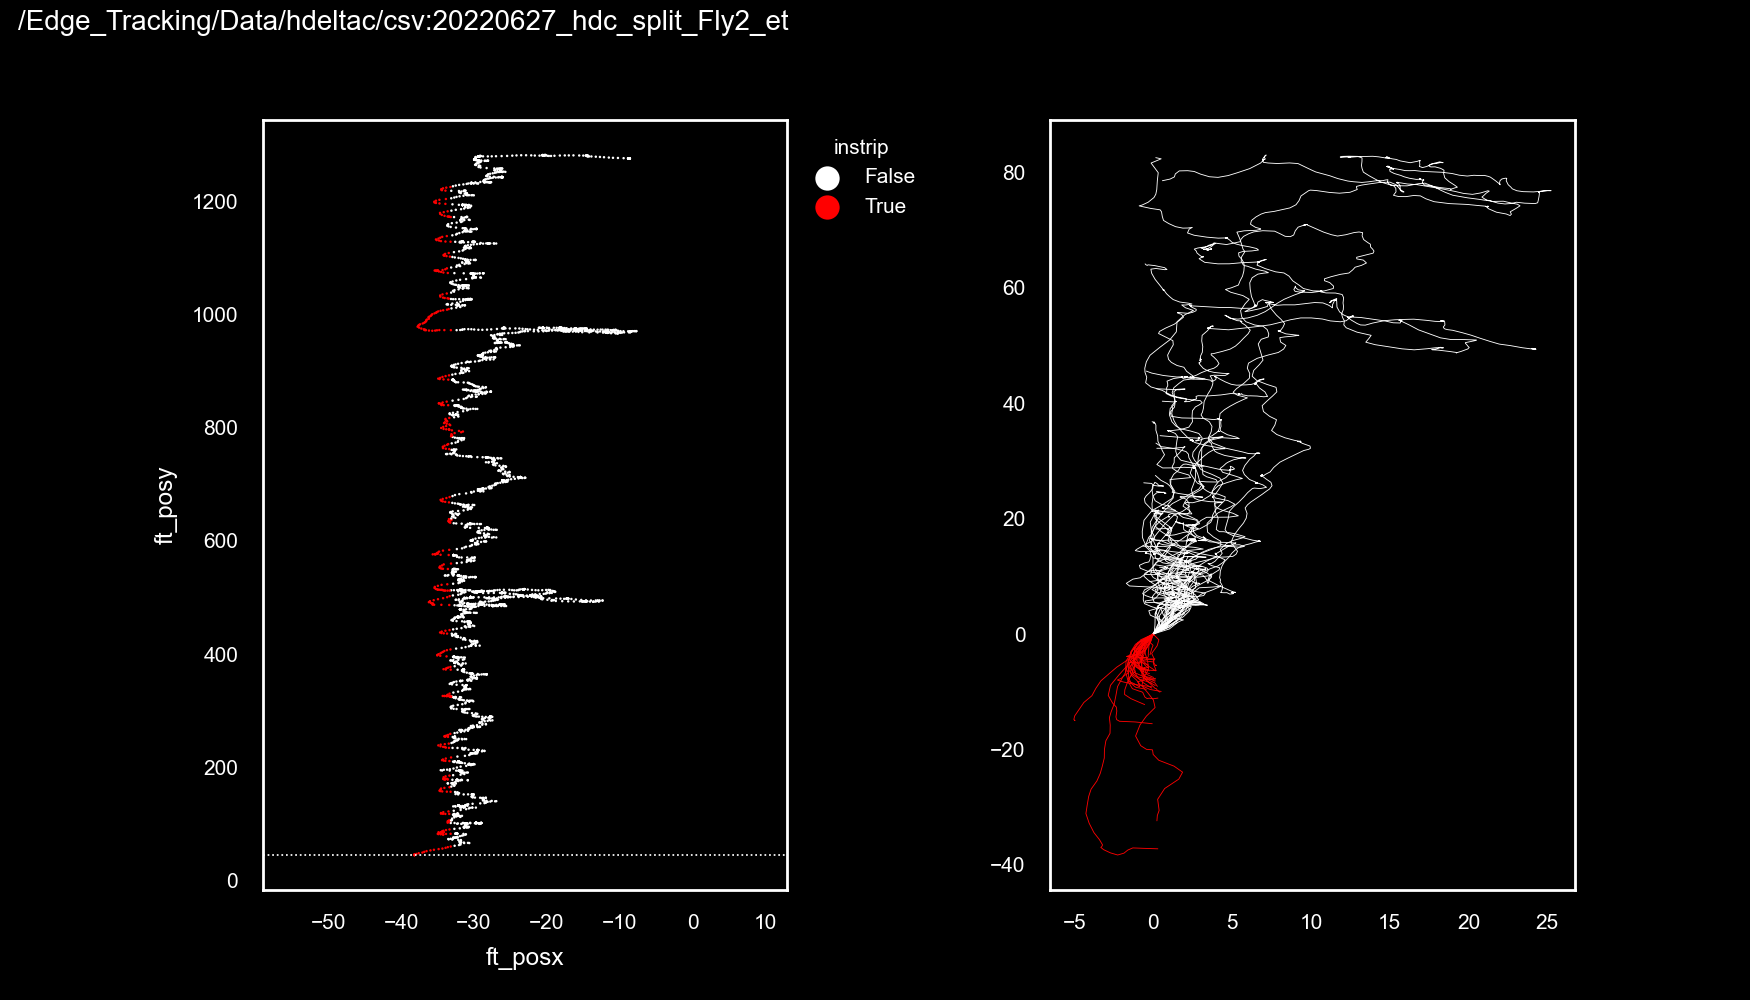

<IPython.core.display.Javascript object>


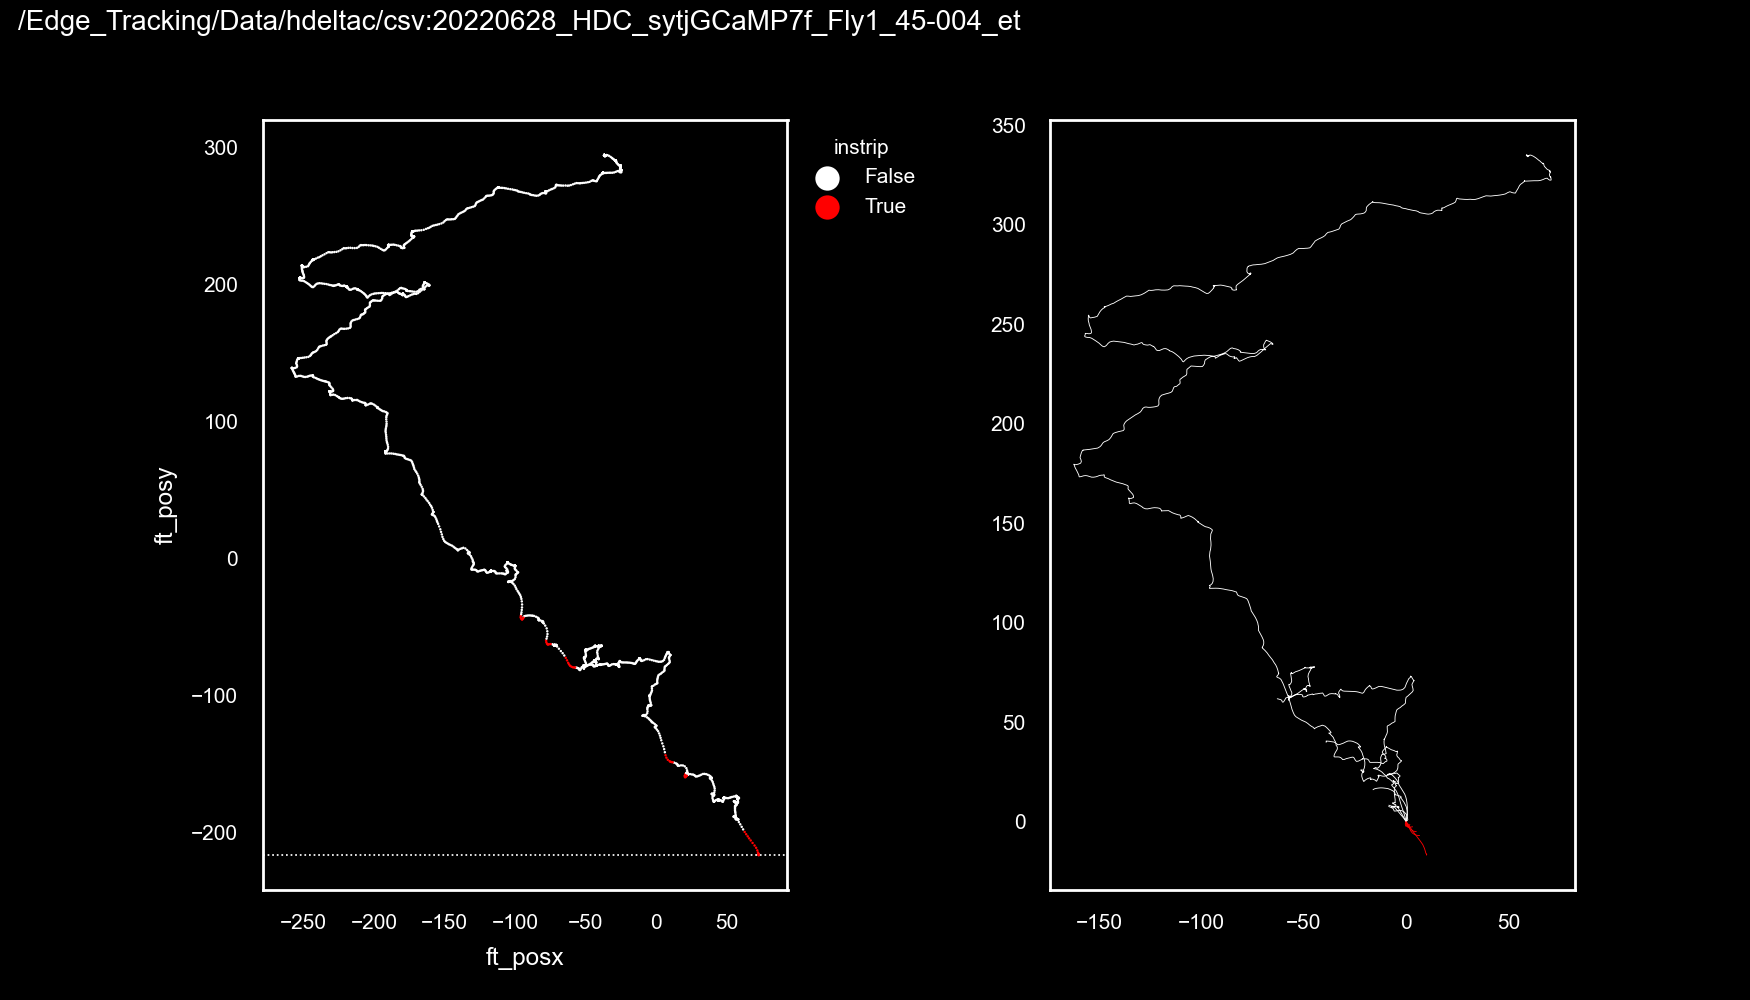

<IPython.core.display.Javascript object>


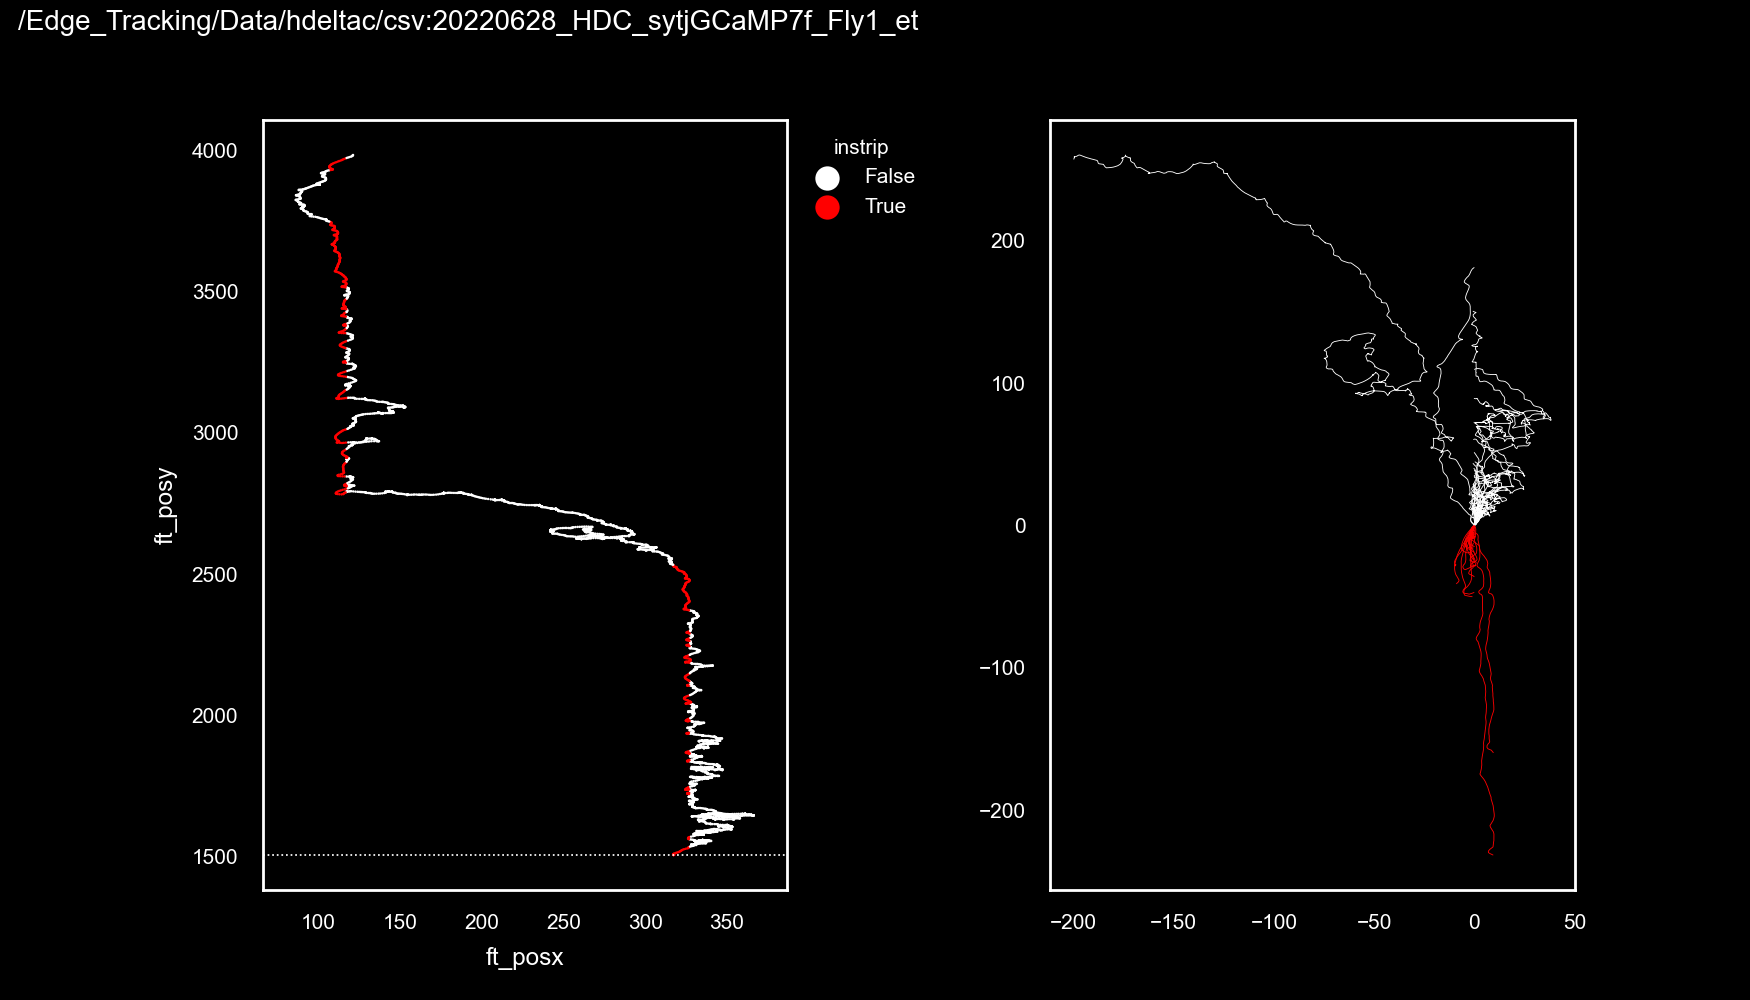

<IPython.core.display.Javascript object>


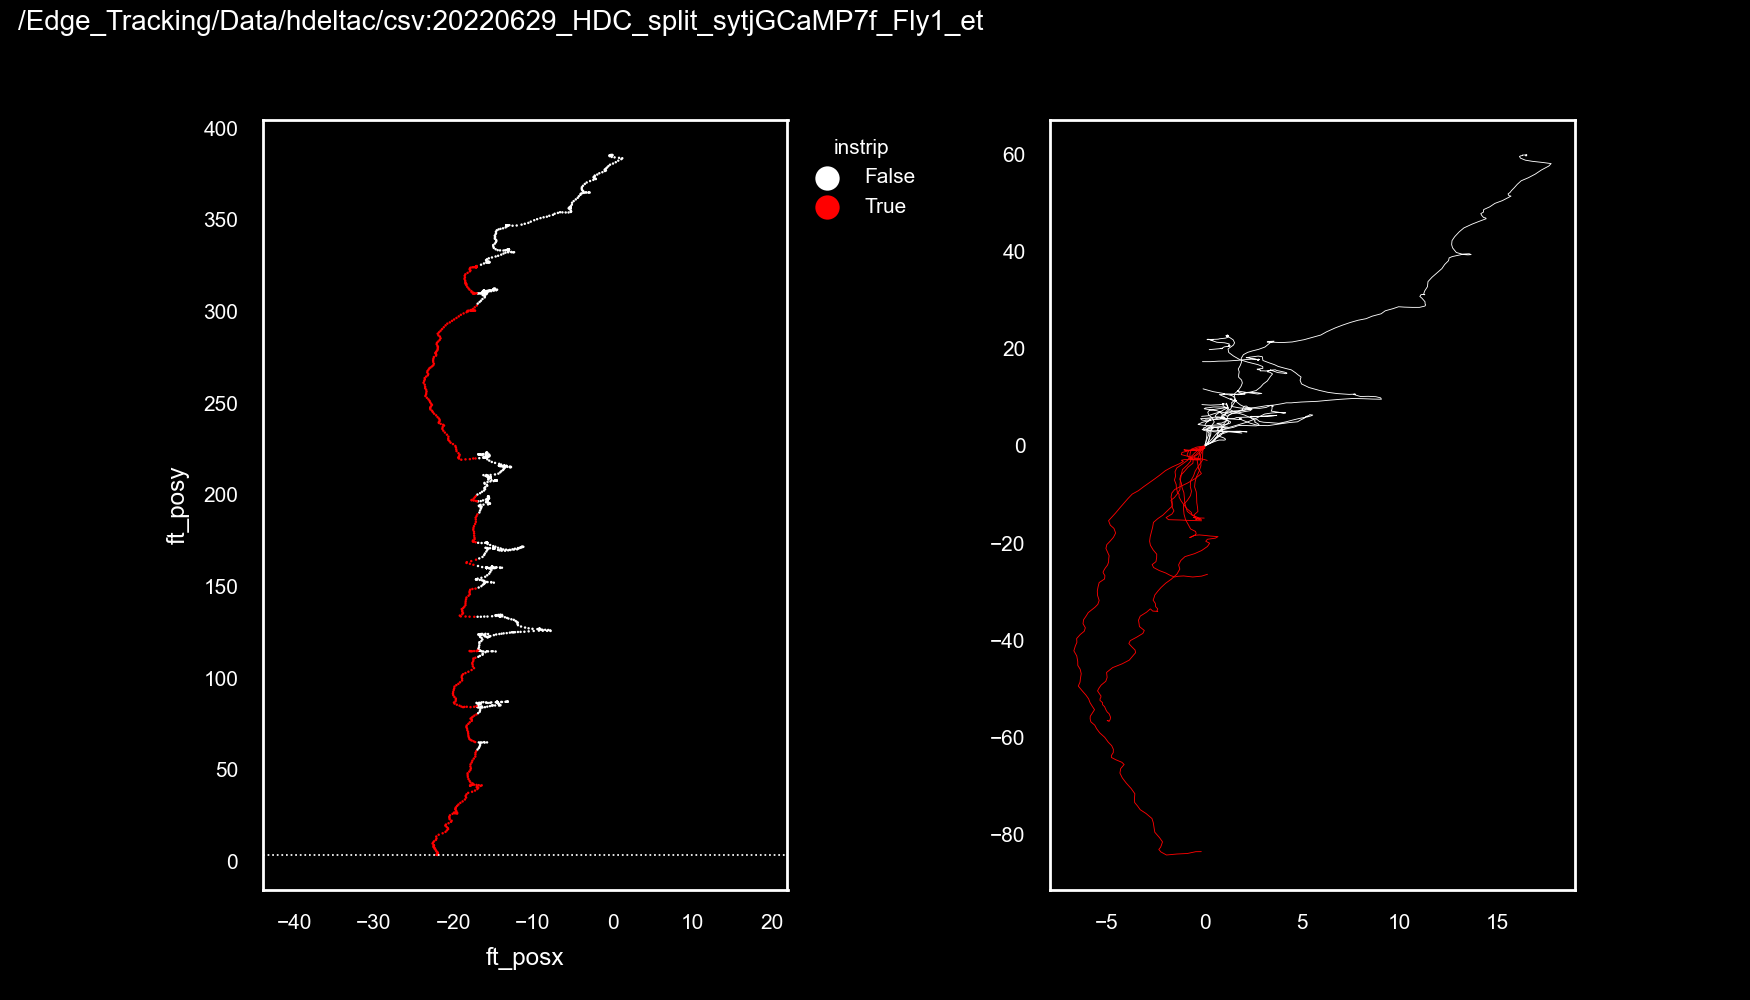

<IPython.core.display.Javascript object>


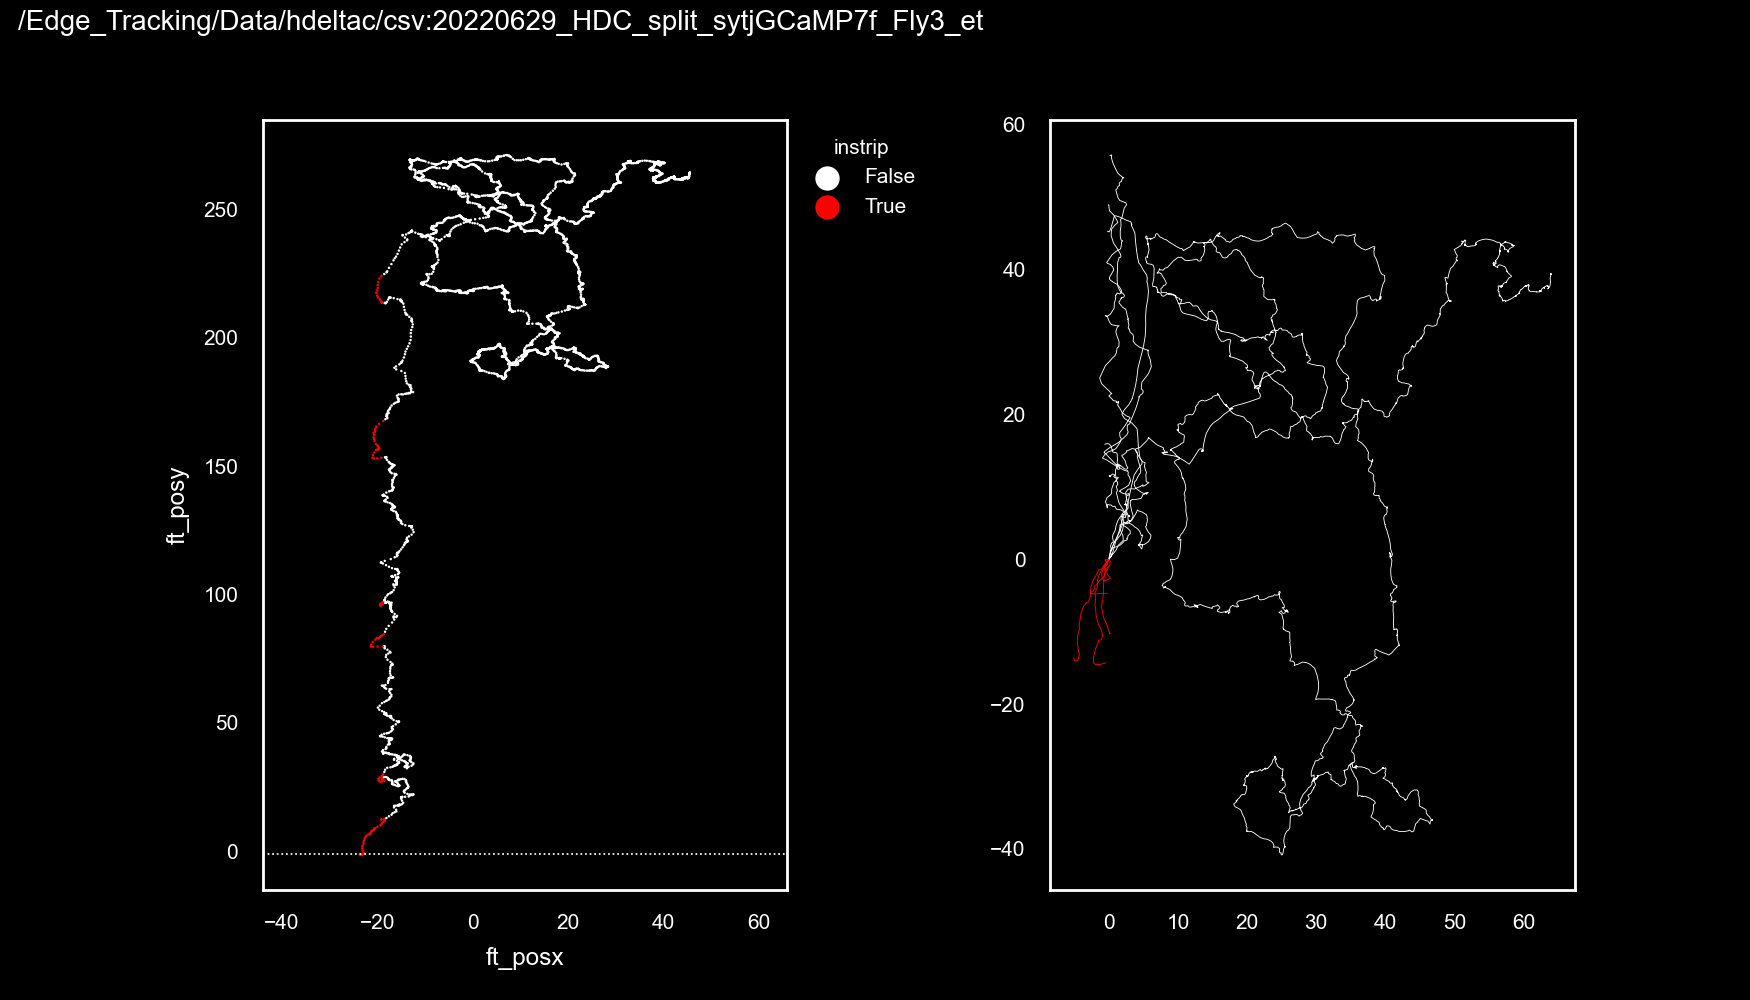

In [291]:
for trial_id, df in df_fp.groupby('trial_id'):
    longbouts = metrics[(metrics['duration']>=2.0) \
                        & (metrics['trial_id']==trial_id)]['boutnum'].unique()
    fig, axn = pl.subplots(1, 2, figsize=(7,4))
    ax=axn[0]
    ax = butil.plot_trajectory(df, ax=ax)
    
    ax=axn[1]
    plotb = df[(df['boutnum']>=2)].copy() #* (df['boutnum'].isin(longbouts))].copy()
    currd = plotb[~plotb['instrip']].copy()
    currbouts = currd['boutnum'].unique()
    
    norm_ = mpl.colors.Normalize(vmin=currbouts.min(), vmax=currbouts.max())
    cmap_ = mpl.cm.viridis
    cols = [cmap_(norm_(v)) for v in currbouts]
    for c, (bnum, b_) in zip(cols, currd.groupby('boutnum')):
        inbout = df[df['boutnum']==bnum-1].copy()
        ax.plot(b_['ft_posx_start0'], b_['ft_posy_start0'], 
            lw=0.25, color='w')
        ax.plot(inbout['ft_posx_start0']-inbout['ft_posx_start0'].iloc[-1], 
                inbout['ft_posy_start0']-inbout['ft_posy_start0'].iloc[-1],
            lw=0.25, color='r')
    pl.subplots_adjust(left=0.15, wspace=0.5, right=0.9)
    util.label_figure(fig, '{}:{}'.format(fig_id, trial_id))
    figname = 'normed_inout_{}'.format(trial_id)
    pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))